# Lab 7 -  Act locally: linearize!

### Name: 
### Lab section:

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import ode #ode solver package

### Assignment Overview:

In this lab, we will *linearize*  nonlinear systems and classify the dynamics near the fixed points. To do this, we use the Jacobian matrix to define a linear system to approximate the dynamics of the nonlinear system in the neighborhood of a fixed point. This allows us to classify the flow around the fixed point using the eigenvectors and eigenvalues of the Jacobian.

Here is what you will need to do for each of the models given below:

1.  Find the nullclines and the fixed points of the ODE on paper for the specified parameter values and compute the Jacobian matrix for each fixed point using the specified parameter values (this is also a part of the problem set for this week). Write down the results in your answer. Compute the eigenvalues and of the Jacobian with the specified parameter values using python code and classify the flow around each fixed point in your answer.

2. Plot the phase portrait of the ODE (using the code from lab 5), and set the size of the window so that your plot includes all the fixed points. Overlay the nullcline plots onto the phase portrait using different colors for different types of nullcline. (Hint: you'll need to create two vectors of "x" and "y" coordinates for each nullcline to plot them.) 

3. Use the same code from lab 5 to create a *local* plot of the flow around each fixed point (e.g. using window size of +/- 0.1 in each direction around the fixed point) and compare its appearance with the classification based on the Jacobian in your answer. (Describe whether the flow converges or diverge from the fixed point, whether there is rotation/oscillations in the flow, etc.)



**Part 1: Competition between species**

Two species (figuratively called sheep and rabbits) occupy the same ecological niche and compete with each other. This is represented by the following model:

$$ dS/dt = S*(a-S-b*R) $$
$$ dR/dt = R*(c-R-d*S) $$


**Q1.1:**  use a=2; b=1; c=3; d=2

The eigenvalues of 0 0 are [2. 3.]
The eigenvalues of 0 3 are [-3. -1.]
The eigenvalues of 2 0 are [-2. -1.]
The eigenvalues of 1.0 1.0 are [ 0.41421356 -2.41421356]


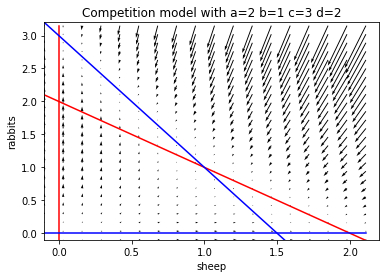

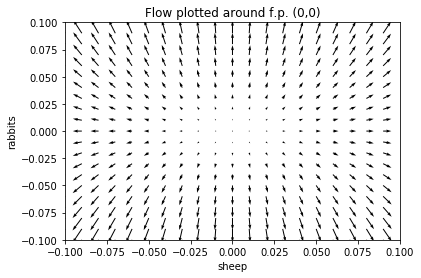

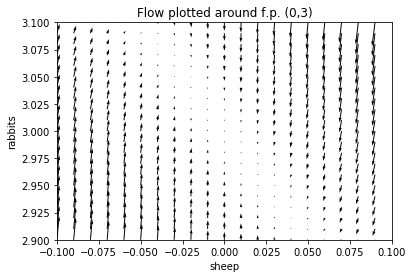

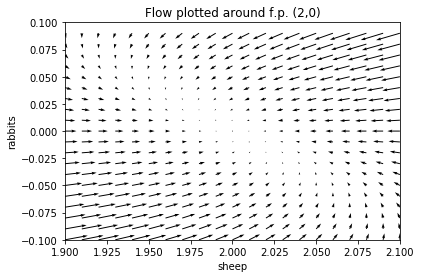

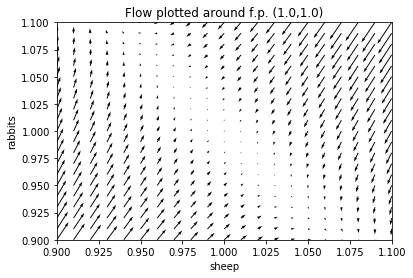

In [23]:
# 1. Fixed points and linearization 
a=2
b=1
c=3
d=2

# the fixed points are as follows
Ss = [0,0,a, (b*c-a)/(b*d-1)]
Rs = [0,c,0, c-d*Ss[3]]

# define the function for the Jacobian
def Jac_funk(S,R,a,b,c,d):
    Jac = np.array([[a-2*S-b*R, -b*S],[-d*R,  c-2*R-d*S ]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Ss)):
    evals, evecs = np.linalg.eig(Jac_funk(Ss[i],Rs[i],a,b,c,d))
    print('The eigenvalues of', Ss[i], Rs[i], 'are', evals)

# 2. Make phase plane plot
smin = -0.1 #change the parameters here to control the range of the axes
smax = 2.2
rmin = -0.1
rmax = 3.2
ds = 0.13 #set the size of the x-step on the grid
dr = 0.13 #set the size of the y-step on the grid
S = np.arange(smin, smax, ds)
R = np.arange(rmin, rmax, dr)
s, r = np.meshgrid(S, R)  #create a grid
    
dS = s*(a-s-b*r)
dR = r*(c-r-d*s)

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(s, r, dS, dR)
plt.xlim(smin,smax)
plt.ylim(rmin, rmax)

Svec = np.arange(smin, smax, ds) # create a vector of sheep
Rvec = np.arange(rmin, rmax, dr) # create a vector of rabbits
Snull1 = np.zeros(len(Rvec)) # first S-nullcline
Snull2 = (a-Svec)/b # second S-nullcline
plt.plot(Snull1,Rvec , 'r') # plot the first S-nullcline
plt.plot(Svec,Snull2, 'r') # plot the second S-nullcline
Rnull1 = np.zeros(len(Svec)) # first S-nullcline
Rnull2 = c-d*Svec # second R-nullcline
plt.plot(Svec,Rnull1, 'b') # plot the first R-nullcline   
plt.plot(Svec,Rnull2, 'b') # plot the second R-nullcline  

plt.xlabel('sheep') 
plt.ylabel('rabbits')
plt.title('Competition model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

# 3. 
for i in np.arange(len(Ss)):
    smin = Ss[i]-0.1 #change the parameters here to control the range of the axes
    smax = Ss[i]+0.1
    rmin = Rs[i]-0.1
    rmax = Rs[i]+0.1
    ds = 0.01 #set the size of the x-step on the grid
    dr = 0.01 #set the size of the y-step on the grid
    S = np.arange(smin, smax, ds)
    R = np.arange(rmin, rmax, dr)
    s, r = np.meshgrid(S, R)  #create a grid
    dS = s*(a-s-b*r)
    dR = r*(c-r-d*s)
    fig, ax = plt.subplots()
    q = ax.quiver(s, r, dS, dR)
    plt.xlim(smin,smax)
    plt.ylim(rmin, rmax)
    plt.xlabel('sheep') 
    plt.ylabel('rabbits')
    plt.title('Flow plotted around f.p. (' + str(Ss[i]) + ',' + str(Rs[i]) + ')')
    plt.show()


1. The S-nullclines are at $S=0$ and $R = (a-S)/b$.

The R-nullclines are at $R=0$ and $R=c-dS$.

The fixed points are: $(0,0)$, $(0,c)$, $(a/b,0)$, and $(bc-a)/(bd-1), c - d(bc-a)/(bd-1))$.

The Jacobian is:
$$
 J = \left(\begin{array}{cc} a-2S-bR & -bS \\ -dR & c-2R-dS \end{array}\right) 
$$

Based on the eigenvalues computed by the code, the classification of flow around each fixed point is the following:

    1. (0,0) is an unstable node 
    2. (0,3) is a stable node
    3. (2,0) is a stable node
    4. (1,1) is a saddle
    
2. The phase plane shows the four fixed points as intersections of the two different types of nullclines and shows that generally the flow converges to the two stable fixed points on the axes.

3. Show flow in the neighborhood of each individual fixed point

The flow around each fixed points corresponds to its classification:
    1. (0,0) the flow runs away in all directions
    2. (0,3) the flow converges toward the fixed point
    3. (2,0) the flow converges toward the fixed point
    4. (1,1) the flow converges from some directions but runs away along the unstable eigenvector

**Q1.2:** use a=2; b=0.5; c=3; d=1

The Jacobian is [[ 2. -0.]
 [ 0.  3.]]
The eigenvalues of 0 0 are [2. 3.]
The Jacobian is [[ 0.5 -0. ]
 [-3.  -3. ]]
The eigenvalues of 0 3 are [-3.   0.5]
The Jacobian is [[-2. -1.]
 [ 0.  1.]]
The eigenvalues of 2 0 are [-2.  1.]
The Jacobian is [[-1.  -0.5]
 [-2.  -2. ]]
The eigenvalues of 1.0 2.0 are [-0.38196601 -2.61803399]


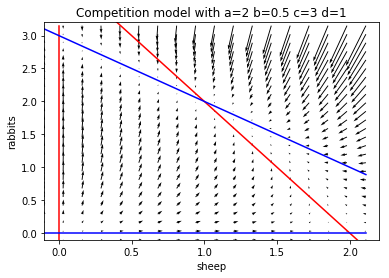

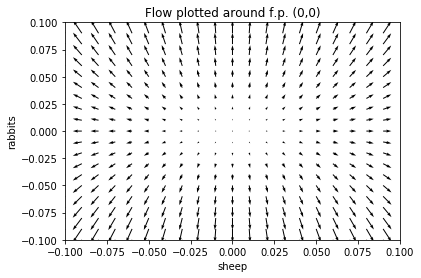

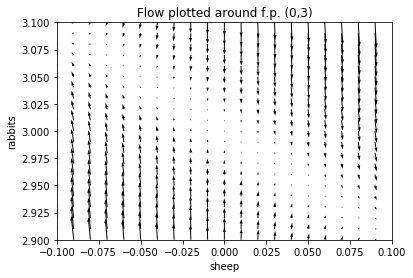

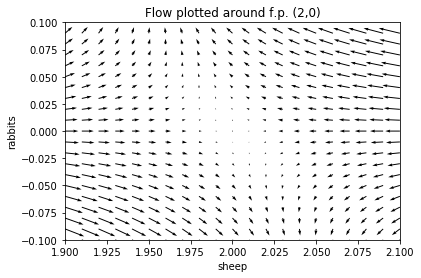

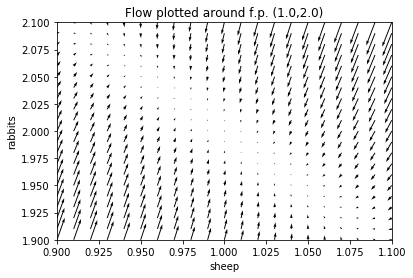

In [5]:
# 1. Fixed points and linearization 
a=2
b=0.5
c=3
d=1

# the fixed points are as follows
Ss = [0,0,a, (b*c-a)/(b*d-1)]
Rs = [0,c,0, c-d*Ss[3]]

# define the function for the Jacobian
def Jac_funk(S,R,a,b,c,d):
    Jac = np.array([[a-2*S-b*R, -b*S],[-d*R,  c-2*R-d*S ]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Ss)):
    Jac_mat = Jac_funk(Ss[i],Rs[i],a,b,c,d)
    print('The Jacobian is', Jac_mat)
    evals, evecs = np.linalg.eig(Jac_mat)
    print('The eigenvalues of', Ss[i], Rs[i], 'are', evals)

# 2. Make phase plane plot
smin = -0.1 #change the parameters here to control the range of the axes
smax = 2.2
rmin = -0.1
rmax = 3.2
ds = 0.13 #set the size of the x-step on the grid
dr = 0.13 #set the size of the y-step on the grid
S = np.arange(smin, smax, ds)
R = np.arange(rmin, rmax, dr)
s, r = np.meshgrid(S, R)  #create a grid
    
dS = s*(a-s-b*r)
dR = r*(c-r-d*s)

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(s, r, dS, dR)
plt.xlim(smin,smax)
plt.ylim(rmin, rmax)

Svec = np.arange(smin, smax, ds) # create a vector of sheep
Rvec = np.arange(rmin, rmax, dr) # create a vector of rabbits
Snull1 = np.zeros(len(Rvec)) # first S-nullcline
Snull2 = (a-Svec)/b # second S-nullcline
plt.plot(Snull1,Rvec , 'r') # plot the first S-nullcline
plt.plot(Svec,Snull2, 'r') # plot the second S-nullcline
Rnull1 = np.zeros(len(Svec)) # first S-nullcline
Rnull2 = c-d*Svec # second R-nullcline
plt.plot(Svec,Rnull1, 'b') # plot the first R-nullcline   
plt.plot(Svec,Rnull2, 'b') # plot the second R-nullcline  

plt.xlabel('sheep') 
plt.ylabel('rabbits')
plt.title('Competition model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

# 3. 
for i in np.arange(len(Ss)):
    smin = Ss[i]-0.1 #change the parameters here to control the range of the axes
    smax = Ss[i]+0.1
    rmin = Rs[i]-0.1
    rmax = Rs[i]+0.1
    ds = 0.01 #set the size of the x-step on the grid
    dr = 0.01 #set the size of the y-step on the grid
    S = np.arange(smin, smax, ds)
    R = np.arange(rmin, rmax, dr)
    s, r = np.meshgrid(S, R)  #create a grid
    dS = s*(a-s-b*r)
    dR = r*(c-r-d*s)
    fig, ax = plt.subplots()
    q = ax.quiver(s, r, dS, dR)
    plt.xlim(smin,smax)
    plt.ylim(rmin, rmax)
    plt.xlabel('sheep') 
    plt.ylabel('rabbits')
    plt.title('Flow plotted around f.p. (' + str(Ss[i]) + ',' + str(Rs[i]) + ')')
    plt.show()

1. The nullclines and the fixed points still have the exact same expressions, so we use the same code to calculate the Jacobian. Based on the eigenvalues computed by the code, the classification of flow around each fixed point is the following:

    1. (0,0) is an unstable node 
    2. (0,3) is a saddle
    3. (2,0) is a saddle
    4. (1,2) is a stable node
    
2. The phase plane shows the four fixed points as intersections of the two different types of nullclines and shows that generally the flow converges to the coexistence equilibrium at (1,2).

3. Show flow in the neighborhood of each individual fixed point

The flow around each fixed points corresponds to its classification:
    1. (0,0) the flow runs away in all directions
    2. (0,3) the flow converges from some directions but runs away along the unstable eigenvector
    3. (2,0) the flow converges from some directions but runs away along the unstable eigenvector
    4. (1,1) the flow converges toward the fixed point 

### Part 2: Symbiotic relationship between species:
A model for two species that interact in a mutually beneficial manner.  Species X dies out in the absence of species Y, while species Y reaches a carrying capacity in the absence of species X:

$$  dX/dt = -a*X + b*X*Y $$
$$  dY/dt = c*Y*(1-Y) + d*X*Y $$

**Q2.1:** use a=1, b=2, c=1, d=3

The Jacobian is [[-1  0]
 [ 0  1]]
The eigenvalues of 0 0 are [-1.  1.]
The Jacobian is [[ 1  0]
 [ 3 -1]]
The eigenvalues of 0 1 are [-1.  1.]
The Jacobian is [[ 0.         -0.33333333]
 [ 1.5        -0.5       ]]
The eigenvalues of -0.16666666666666666 0.5 are [-0.25+0.66143783j -0.25-0.66143783j]


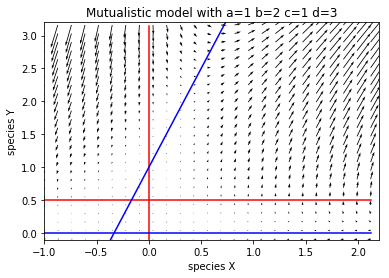

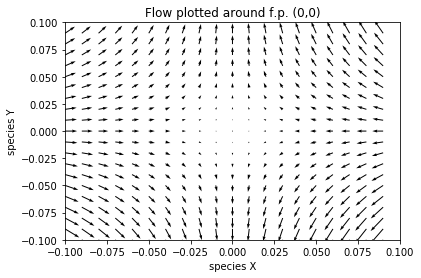

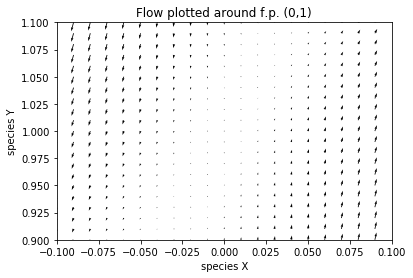

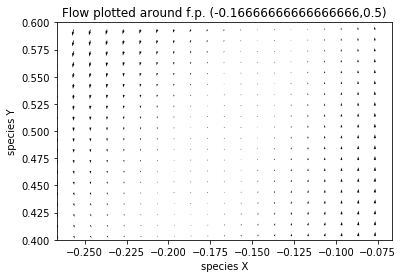

In [2]:
# 1. Fixed points and linearization 
a=1
b=2
c=1
d=3

# the fixed points are as follows
Xs = [0,0,(a-b)/(b*d)]
Ys = [0,1,1+(a-b)/(b*c)]

# define the function for the Jacobian
def Jac_funk2(X,Y,a,b,c,d):
    Jac = np.array([[-a+b*Y, b*X],[d*Y,c*(1-2*Y)+d*X]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Xs)):
    Jac_mat = Jac_funk2(Xs[i],Ys[i],a,b,c,d)
    print('The Jacobian is', Jac_mat)
    evals, evecs = np.linalg.eig(Jac_mat)
    print('The eigenvalues of', Xs[i], Ys[i], 'are', evals)

# 2. Make phase plane plot
xmin = -1 #change the parameters here to control the range of the axes
xmax = 2.2
ymin = -0.1
ymax = 3.2
dx = 0.13 #set the size of the x-step on the grid
dy = 0.13 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(xmin, ymax, dy)
x, y = np.meshgrid(X, Y)  #create a grid
    
dX = -a*x + b*x*y
dY = c*y*(1-y) + d*x*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dX, dY)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

Xvec = np.arange(xmin, xmax, dx) # create a vector of X
Yvec = np.arange(ymin, ymax, dy) # create a vector of Y
Xnull1 = np.zeros(len(Yvec)) # first S-nullcline
Xnull2 = np.repeat(a/b,len(Xvec))  # second S-nullcline
plt.plot(Xnull1,Yvec, 'r') # plot the first S-nullcline
plt.plot(Xvec,Xnull2, 'r') # plot the second S-nullcline
Ynull1 = np.zeros(len(Xvec)) # first S-nullcline
Ynull2 = 1+d/c*Xvec # second R-nullcline
plt.plot(Xvec,Ynull1, 'b') # plot the first Y-nullcline   
plt.plot(Xvec,Ynull2, 'b') # plot the second Y-nullcline  

plt.xlabel('species X') 
plt.ylabel('species Y')
plt.title('Mutualistic model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

for i in np.arange(len(Xs)):
    xmin = Xs[i]-0.1 #change the parameters here to control the range of the axes
    xmax = Xs[i]+0.1
    ymin = Ys[i]-0.1
    ymax = Ys[i]+0.1
    dx = 0.01 #set the size of the x-step on the grid
    dy = 0.01 #set the size of the y-step on the grid
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(xmin, ymax, dy)
    x, y = np.meshgrid(X, Y)  #create a grid
    
    dX = -a*x + b*x*y
    dY = c*y*(1-y) + d*x*y

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    q = ax.quiver(x, y, dX, dY)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.xlabel('species X') 
    plt.ylabel('species Y')
    plt.title('Flow plotted around f.p. (' + str(Xs[i]) + ',' + str(Ys[i]) + ')')
    plt.show()

1. The X-nullclines are at $X=0$ and $Y = a/b$.

The Y-nullclines are at $Y=0$ and $Y=1 +d/c*X$.

The fixed points are: $(0,0)$, $(0,1)$, and $(a-b)/(bd), 1 + (a-b)/(bc))$.

The Jacobian is:
$$
 J = \left(\begin{array}{cc}-a+bY & bX \\ dY & c(1-2Y)+dX\end{array}\right) 
$$

Based on the eigenvalues computed by the code, the classification of flow around each fixed point is the following:

    1. (0,0) is a saddle 
    2. (0,1) is a saddle
    3. (-1/6,0.5) is a stable spiral

    
2. The phase plane shows the three fixed points as intersections of the two different types of nullclines and shows that generally the flow runs away to positive infinity (the only stable fixed point has a negative population!)

3. Show flow in the neighborhood of each individual fixed point

The flow around each fixed points corresponds to its classification:
    1. (0,0) the flow runs away along one direction
    2. (0,1) the flow runs away along one direction
    3. (-1/6,0.5) the flow rotates and seems to converge to the fixed point

**Q2.2:** use a=2, b=1, c=1, d=2

The Jacobian is [[-2  0]
 [ 0  1]]
The eigenvalues of 0 0 are [-2.  1.]
The Jacobian is [[-1  0]
 [ 2 -1]]
The eigenvalues of 0 1 are [-1. -1.]
The Jacobian is [[ 0.   0.5]
 [ 4.  -2. ]]
The eigenvalues of 0.5 2.0 are [ 0.73205081 -2.73205081]


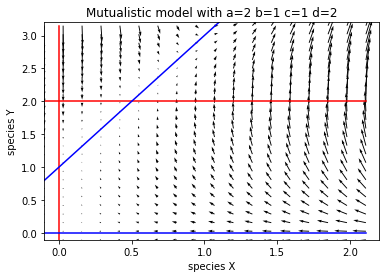

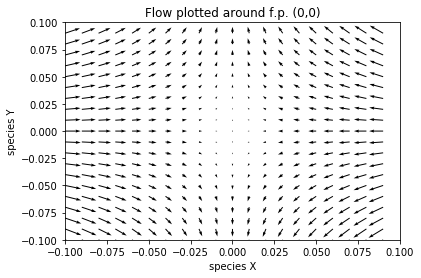

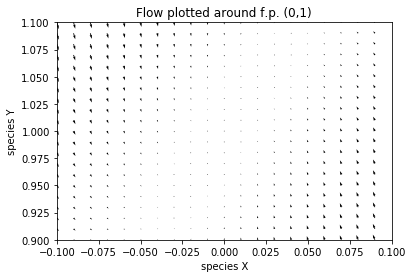

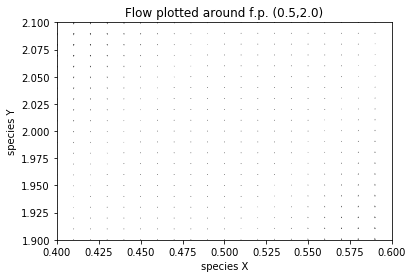

In [3]:
# 1. Fixed points and linearization 
a=2
b=1
c=1
d=2

# the fixed points are as follows
Xs = [0,0,(a-b)/(b*d)]
Ys = [0,1,1+(a-b)/(b*c)]

# define the function for the Jacobian
def Jac_funk2(X,Y,a,b,c,d):
    Jac = np.array([[-a+b*Y, b*X],[d*Y,c*(1-2*Y)+d*X]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Xs)):
    Jac_mat = Jac_funk2(Xs[i],Ys[i],a,b,c,d)
    print('The Jacobian is', Jac_mat)
    evals, evecs = np.linalg.eig(Jac_mat)
    print('The eigenvalues of', Xs[i], Ys[i], 'are', evals)

# 2. Make phase plane plot
xmin = -0.1 #change the parameters here to control the range of the axes
xmax = 2.2
ymin = -0.1
ymax = 3.2
dx = 0.13 #set the size of the x-step on the grid
dy = 0.13 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(xmin, ymax, dy)
x, y = np.meshgrid(X, Y)  #create a grid
    
dX = -a*x + b*x*y
dY = c*y*(1-y) + d*x*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dX, dY)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

Xvec = np.arange(xmin, xmax, dx) # create a vector of X
Yvec = np.arange(ymin, ymax, dy) # create a vector of Y
Xnull1 = np.zeros(len(Yvec)) # first S-nullcline
Xnull2 = np.repeat(a/b,len(Xvec))  # second S-nullcline
plt.plot(Xnull1,Yvec, 'r') # plot the first S-nullcline
plt.plot(Xvec,Xnull2, 'r') # plot the second S-nullcline
Ynull1 = np.zeros(len(Xvec)) # first S-nullcline
Ynull2 = 1+d/c*Xvec # second R-nullcline
plt.plot(Xvec,Ynull1, 'b') # plot the first Y-nullcline   
plt.plot(Xvec,Ynull2, 'b') # plot the second Y-nullcline  

plt.xlabel('species X') 
plt.ylabel('species Y')
plt.title('Mutualistic model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

for i in np.arange(len(Xs)):
    xmin = Xs[i]-0.1 #change the parameters here to control the range of the axes
    xmax = Xs[i]+0.1
    ymin = Ys[i]-0.1
    ymax = Ys[i]+0.1
    dx = 0.01 #set the size of the x-step on the grid
    dy = 0.01 #set the size of the y-step on the grid
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(xmin, ymax, dy)
    x, y = np.meshgrid(X, Y)  #create a grid
    
    dX = -a*x + b*x*y
    dY = c*y*(1-y) + d*x*y

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    q = ax.quiver(x, y, dX, dY)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.xlabel('species X') 
    plt.ylabel('species Y')
    plt.title('Flow plotted around f.p. (' + str(Xs[i]) + ',' + str(Ys[i]) + ')')
    plt.show()

(your written answer goes here)

### Lotka-Volterra predator-prey model:
The following famous model describes dynamics of two species, one of which preys on the other. Assume the prey grows without bound without the predator, and the predators die without the prey. The interaction of predators and prey has a positive effect on the predators, and a negative effect on the prey:

$$   dP/dt = -d*P + a*P*R $$
$$   dR/dt = c*R - b*P*R $$

**Q3.1** use c=2; d=5; a=0.5; b=0.4

The eigenvalues of 0 0 are [-5.  2.]
The eigenvalues of 5.0 10.0 are [0.+3.16227766j 0.-3.16227766j]


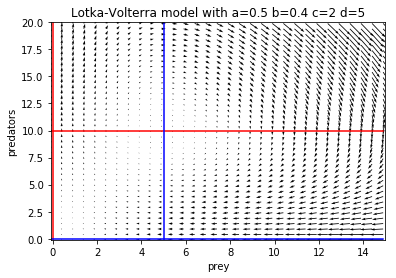

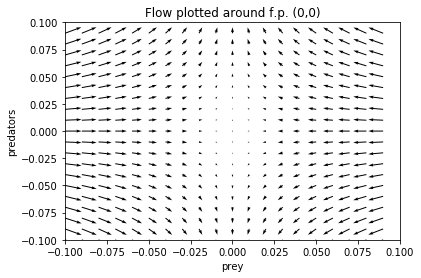

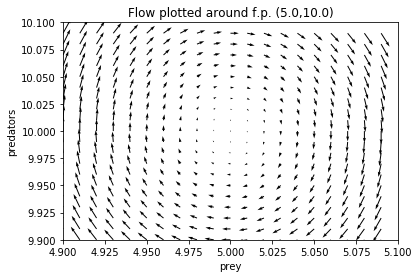

In [10]:
# 1. Fixed points and linearization 
a=0.5
b=0.4
c=2
d=5

# the fixed points are as follows
Ps = [0,c/b]
Rs = [0,d/a]

# define the function for the Jacobian
def Jac_funk3(P,R,a,b,c,d):
    Jac = np.array([[-d+a*R, a*P],[-b*R,c-b*P]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Ps)):
    evals, evecs = np.linalg.eig(Jac_funk3(Ps[i],Rs[i],a,b,c,d))
    print('The eigenvalues of', Ps[i], Rs[i], 'are', evals)

# 2. Make phase plane plot
pmin = -0.1 #change the parameters here to control the range of the axes
pmax = 15
rmin = -0.1
rmax = 20
dp = 0.5 #set the size of the x-step on the grid
dr = 0.5 #set the size of the y-step on the grid
P = np.arange(pmin, pmax, dp)
R = np.arange(rmin, rmax, dr)
p, r = np.meshgrid(P, R)  #create a grid
    
dP = -d*p + a*p*r
dR = c*r -b*p*r

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(p, r, dP, dR)
plt.xlim(pmin,pmax)
plt.ylim(rmin,rmax)

Pvec = np.arange(pmin, pmax, dp) # create a vector of X
Rvec = np.arange(rmin, rmax, dr) # create a vector of Y
Pnull1 = np.zeros(len(Rvec)) # first P-nullcline
Pnull2 = np.repeat(d/a,len(Pvec))  # second P-nullcline
plt.plot(Pnull1,Rvec, 'r') # plot the first P-nullcline
plt.plot(Pvec,Pnull2, 'r') # plot the second P-nullcline
Rnull1 = np.zeros(len(Pvec)) # first R-nullcline
Rnull2 = np.repeat(c/b,len(Rvec)) # second R-nullcline
plt.plot(Pvec,Rnull1, 'b') # plot the first Y-nullcline   
plt.plot(Rnull2,Rvec, 'b') # plot the second Y-nullcline  

plt.xlabel('prey') 
plt.ylabel('predators')
plt.title('Lotka-Volterra model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

for i in np.arange(len(Ps)):
    pmin = Ps[i]-0.1 #change the parameters here to control the range of the axes
    pmax = Ps[i]+0.1
    rmin = Rs[i]-0.1
    rmax = Rs[i]+0.1
    dp = 0.01 #set the size of the x-step on the grid
    dr = 0.01 #set the size of the y-step on the grid
    P = np.arange(pmin, pmax, dp)
    R = np.arange(rmin, rmax, dr)
    p, r = np.meshgrid(P, R)  #create a grid
    
    dP = -d*p + a*p*r
    dR = c*r -b*p*r

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    q = ax.quiver(p, r, dP, dR)
    plt.xlim(pmin,pmax)
    plt.ylim(rmin,rmax)
    plt.xlabel('prey') 
    plt.ylabel('predators')
    plt.title('Flow plotted around f.p. (' + str(Ps[i]) + ',' + str(Rs[i]) + ')')
    plt.show()

1. The P-nullclines are $P=0$ and $R=d/a$
the R-nullcines are $R=0$ and $P = c/b$
There are two fixed points $(0,0)$ and $(c/b,d/a)$.

The Jacobian is
$$
 J = \left(\begin{array}{cc}-d + aR & aP \\ -bR & c-bP\end{array}\right) 
$$
The (0,0) is always a saddle, the coexistence fixed point is always a center with oscillations around it.

**Q3.2** use c=10; d=5; a=0.5; b=0.4

The eigenvalues of 0 0 are [-5. 10.]
The eigenvalues of 25.0 10.0 are [0.+7.07106781j 0.-7.07106781j]


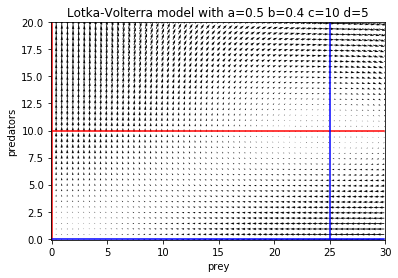

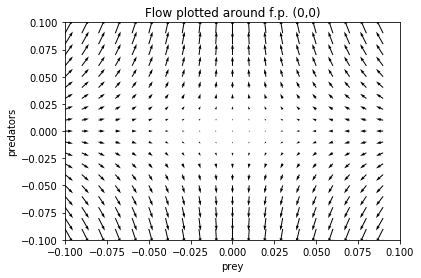

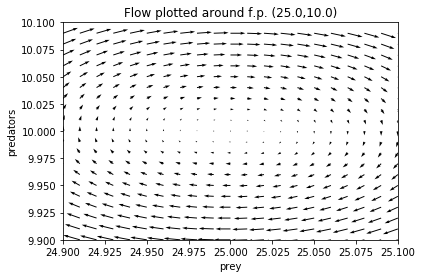

In [12]:
# 1. Fixed points and linearization 
a=0.5
b=0.4
c=10
d=5

# the fixed points are as follows
Ps = [0,c/b]
Rs = [0,d/a]

# define the function for the Jacobian
def Jac_funk3(P,R,a,b,c,d):
    Jac = np.array([[-d+a*R, a*P],[-b*R,c-b*P]])
    return Jac
# Calculate and print eigenvalues for Jacobian at each fixed point
for i in np.arange(len(Ps)):
    evals, evecs = np.linalg.eig(Jac_funk3(Ps[i],Rs[i],a,b,c,d))
    print('The eigenvalues of', Ps[i], Rs[i], 'are', evals)

# 2. Make phase plane plot
pmin = -0.1 #change the parameters here to control the range of the axes
pmax = 30
rmin = -0.1
rmax = 20
dp = 0.5 #set the size of the x-step on the grid
dr = 0.5 #set the size of the y-step on the grid
P = np.arange(pmin, pmax, dp)
R = np.arange(rmin, rmax, dr)
p, r = np.meshgrid(P, R)  #create a grid
    
dP = -d*p + a*p*r
dR = c*r -b*p*r

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(p, r, dP, dR)
plt.xlim(pmin,pmax)
plt.ylim(rmin,rmax)

Pvec = np.arange(pmin, pmax, dp) # create a vector of X
Rvec = np.arange(rmin, rmax, dr) # create a vector of Y
Pnull1 = np.zeros(len(Rvec)) # first P-nullcline
Pnull2 = np.repeat(d/a,len(Pvec))  # second P-nullcline
plt.plot(Pnull1,Rvec, 'r') # plot the first P-nullcline
plt.plot(Pvec,Pnull2, 'r') # plot the second P-nullcline
Rnull1 = np.zeros(len(Pvec)) # first R-nullcline
Rnull2 = np.repeat(c/b,len(Rvec)) # second R-nullcline
plt.plot(Pvec,Rnull1, 'b') # plot the first Y-nullcline   
plt.plot(Rnull2,Rvec, 'b') # plot the second Y-nullcline  

plt.xlabel('prey') 
plt.ylabel('predators')
plt.title('Lotka-Volterra model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' d='+ str(d))
plt.show()

for i in np.arange(len(Ps)):
    pmin = Ps[i]-0.1 #change the parameters here to control the range of the axes
    pmax = Ps[i]+0.1
    rmin = Rs[i]-0.1
    rmax = Rs[i]+0.1
    dp = 0.01 #set the size of the x-step on the grid
    dr = 0.01 #set the size of the y-step on the grid
    P = np.arange(pmin, pmax, dp)
    R = np.arange(rmin, rmax, dr)
    p, r = np.meshgrid(P, R)  #create a grid
    
    dP = -d*p + a*p*r
    dR = c*r -b*p*r

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    q = ax.quiver(p, r, dP, dR)
    plt.xlim(pmin,pmax)
    plt.ylim(rmin,rmax)
    plt.xlabel('prey') 
    plt.ylabel('predators')
    plt.title('Flow plotted around f.p. (' + str(Ps[i]) + ',' + str(Rs[i]) + ')')
    plt.show()

(your written answer goes here)

### Rubric:

**Part 1:** 
6 pts per question (2 pts per task)

**Part 2:** 
6 pts per question (2 pts per task)

**Part 3:**
6 pts per question (2 pts per task)

**Total: 36 pts**